In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

# Create plots directory if it doesn't exist
PLOTS_DIR = '../plots'
if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [13]:
# Load the CONVERTED CSV file
try:
    df = pd.read_csv('../data/insurance_data.csv')
    print("Dataset loaded successfully.")
    df.head()
except FileNotFoundError:
    print("Error: 'insurance_data.csv' not found. Please run the conversion script first.")

C:\Users\Yoga i7\AppData\Local\Temp\ipykernel_16116\2138379330.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/insurance_data.csv')


Dataset loaded successfully.


In [15]:
# Descriptive Statistics for numerical features
print("--- Descriptive Statistics ---")
display(df.describe())

print("\n" + "="*50 + "\n")

# Data Structure and Types
print("--- Data Structure (dtypes) and Non-null Counts ---")
df.info()

--- Descriptive Statistics ---


,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05




--- Data Structure (dtypes) and Non-null Counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000

In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Missing Value Analysis:")
print(missing_info[missing_info['Missing Values'] > 0].sort_values(by='Percentage', ascending=False))

Missing Value Analysis:
                         Missing Values  Percentage
NumberOfVehiclesInFleet         1000098  100.000000
CrossBorder                      999400   99.930207
CustomValueEstimate              779642   77.956560
WrittenOff                       641901   64.183810
Converted                        641901   64.183810
Rebuilt                          641901   64.183810
NewVehicle                       153295   15.327998
Bank                             145961   14.594670
AccountType                       40232    4.022806
Gender                             9536    0.953507
MaritalStatus                      8259    0.825819
mmcode                              552    0.055195
VehicleType                         552    0.055195
make                                552    0.055195
VehicleIntroDate                    552    0.055195
NumberOfDoors                       552    0.055195
bodytype                            552    0.055195
kilowatts                           552 

--- Generating Univariate Analysis Plots ---


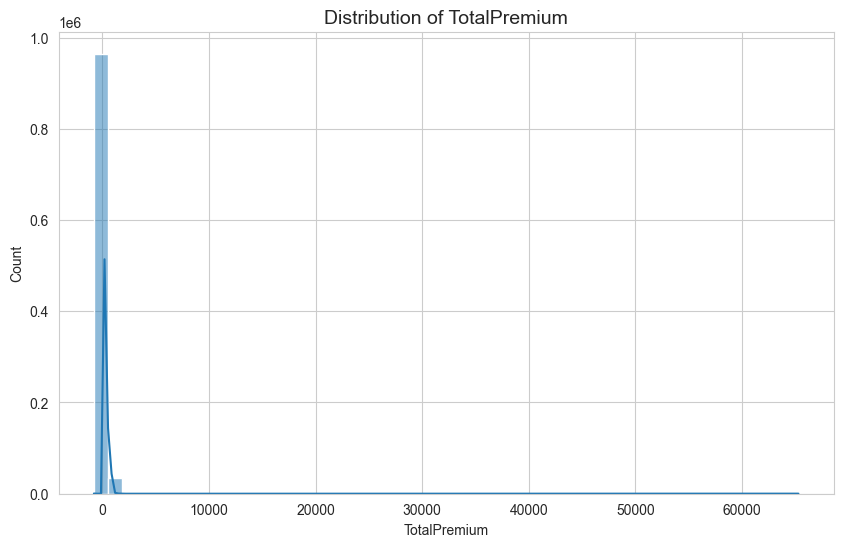

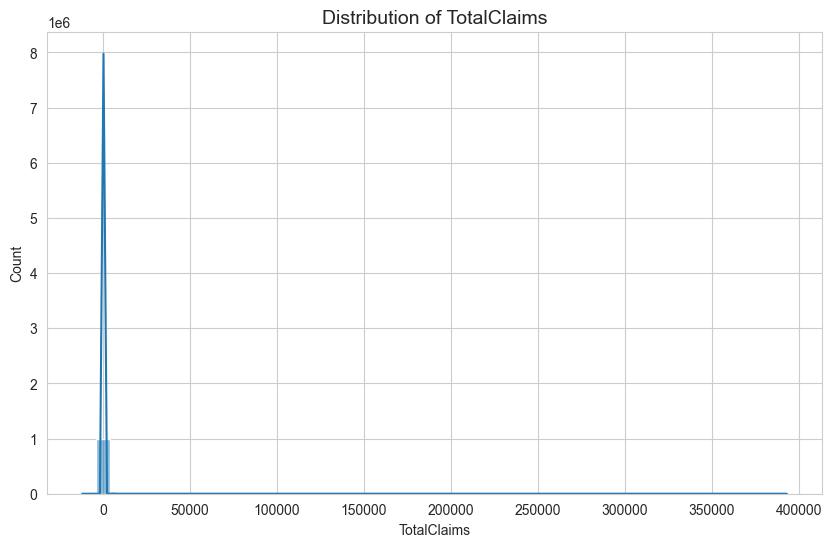

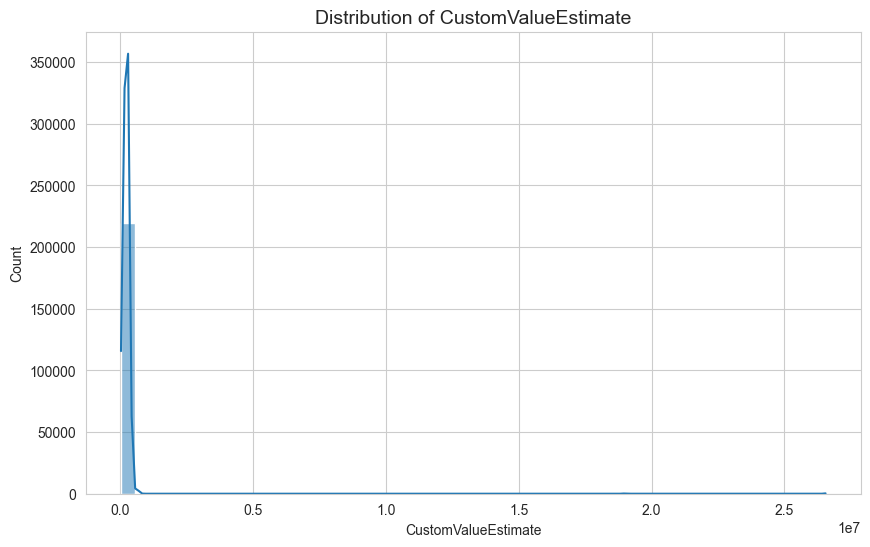

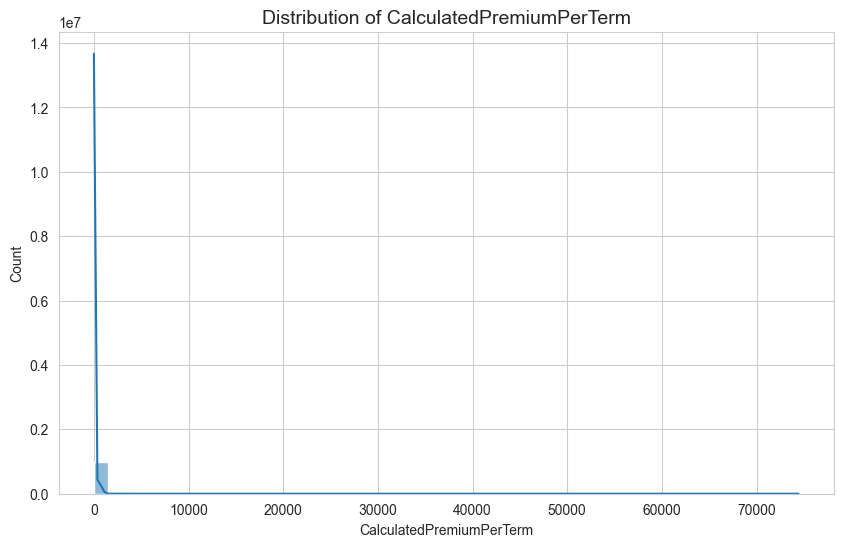

C:\Users\Yoga i7\AppData\Local\Temp\ipykernel_16116\454884509.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


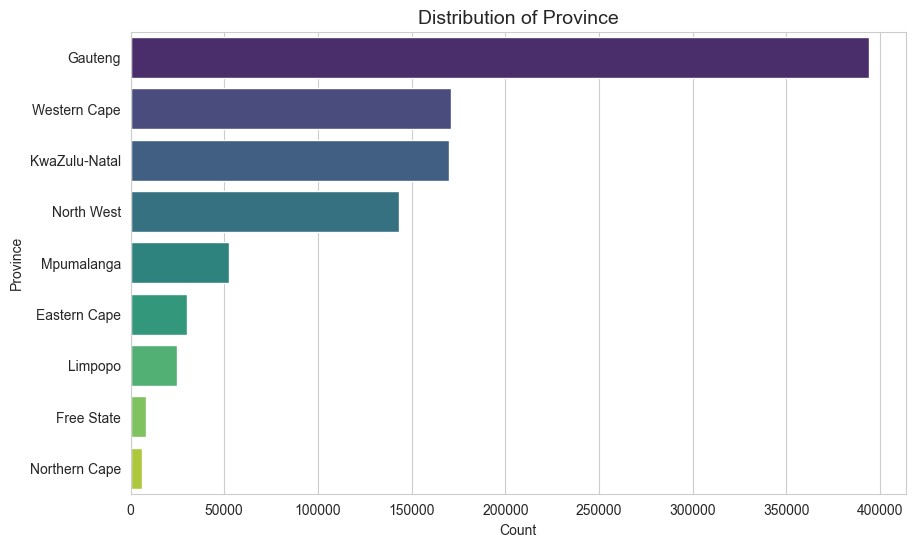

C:\Users\Yoga i7\AppData\Local\Temp\ipykernel_16116\454884509.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


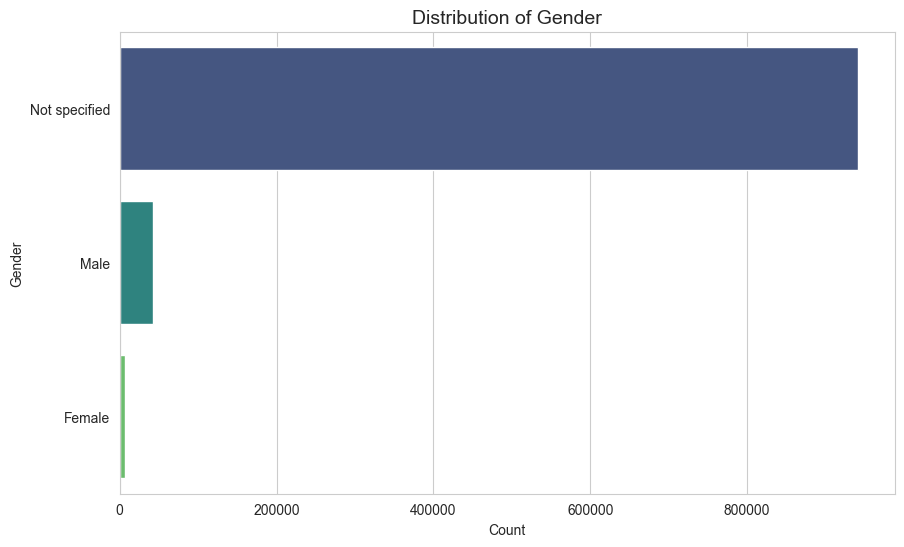

C:\Users\Yoga i7\AppData\Local\Temp\ipykernel_16116\454884509.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


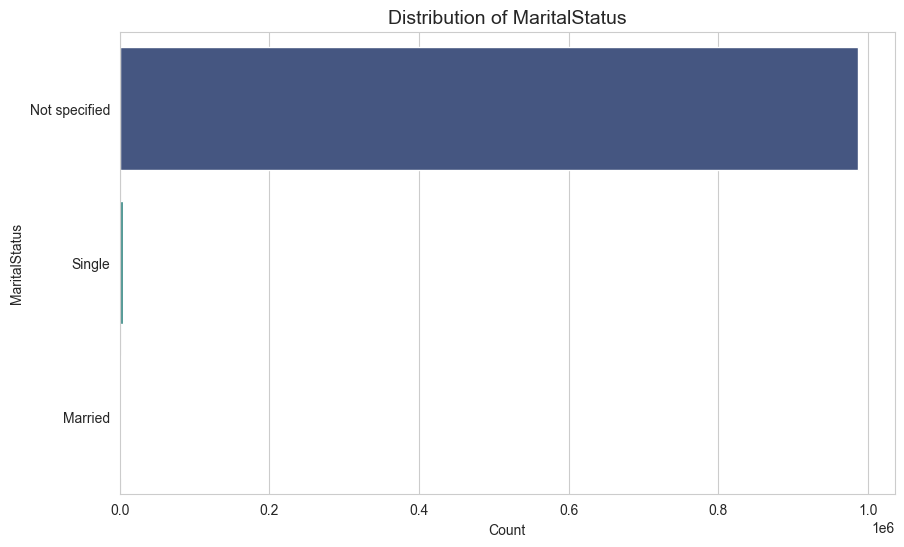

C:\Users\Yoga i7\AppData\Local\Temp\ipykernel_16116\454884509.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


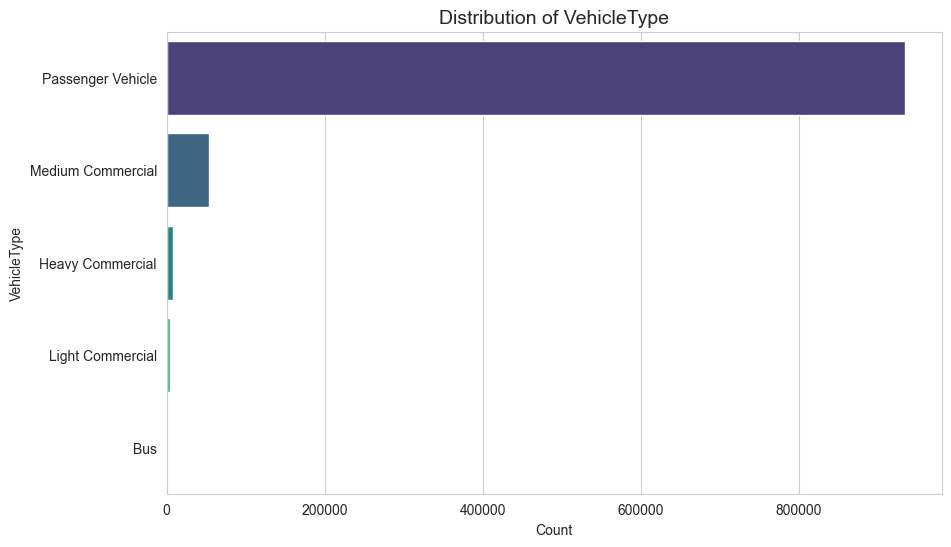

In [16]:
print("--- Generating Univariate Analysis Plots ---")

# Distribution of key numerical variables
numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'CalculatedPremiumPerTerm']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.savefig(os.path.join(PLOTS_DIR, f'dist_{col.lower()}.png'), bbox_inches='tight', dpi=150)
    plt.show()

# Distribution of key categorical variables
categorical_cols = ['Province', 'Gender', 'MaritalStatus', 'VehicleType']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.savefig(os.path.join(PLOTS_DIR, f'dist_{col.lower()}.png'), bbox_inches='tight', dpi=150)
    plt.show()

--- Generating Bivariate Analysis Plots ---


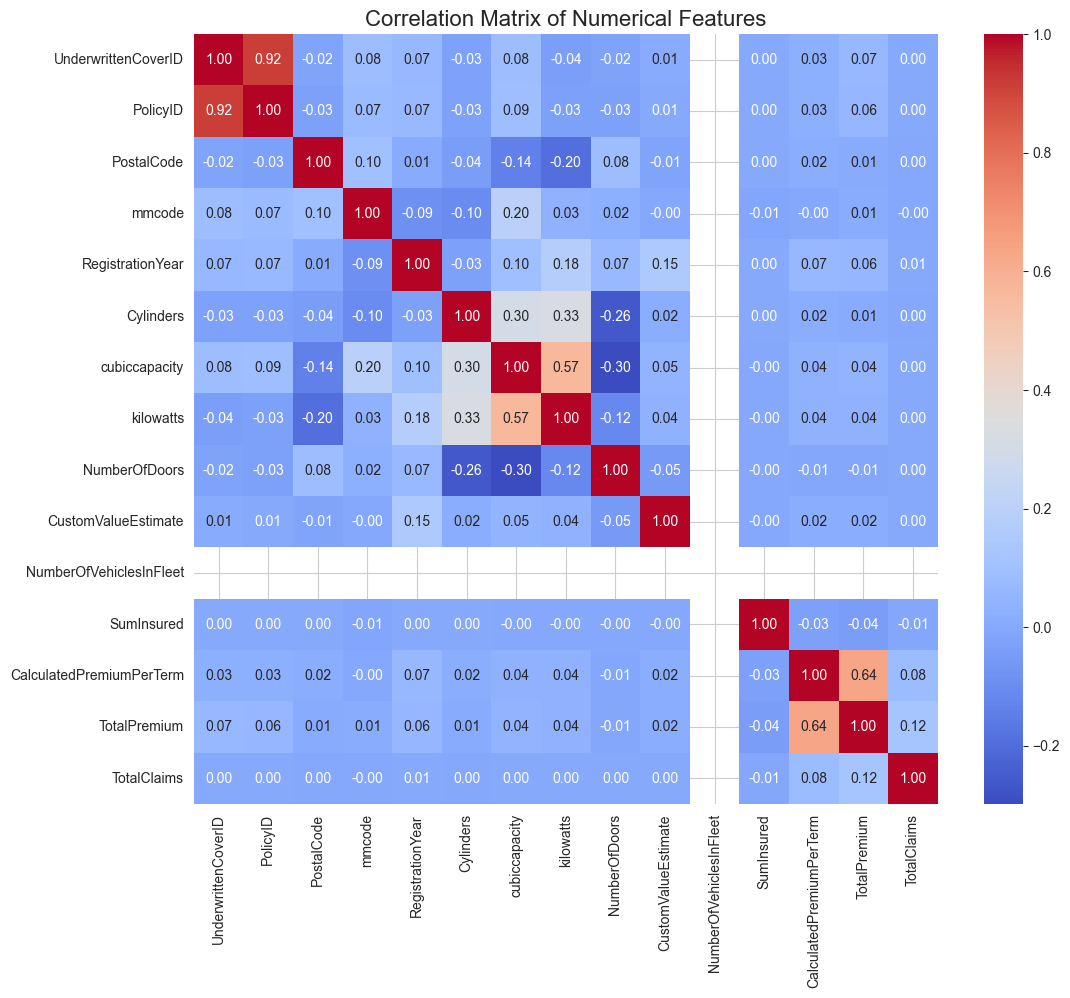

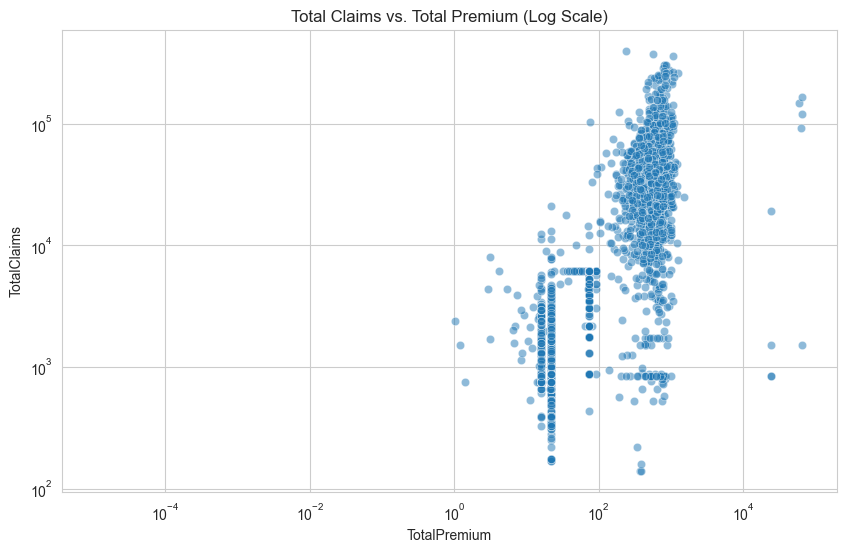

In [17]:
print("--- Generating Bivariate Analysis Plots ---")

# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.savefig(os.path.join(PLOTS_DIR, 'correlation_matrix.png'), bbox_inches='tight', dpi=150)
plt.show()

# Scatter plot: TotalPremium vs. TotalClaims
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', alpha=0.5)
plt.title('Total Claims vs. Total Premium (Log Scale)')
plt.xscale('log')
plt.yscale('log')
plt.savefig(os.path.join(PLOTS_DIR, 'scatter_premium_vs_claims.png'), bbox_inches='tight', dpi=150)
plt.show()

--- Generating Outlier Detection Plots ---


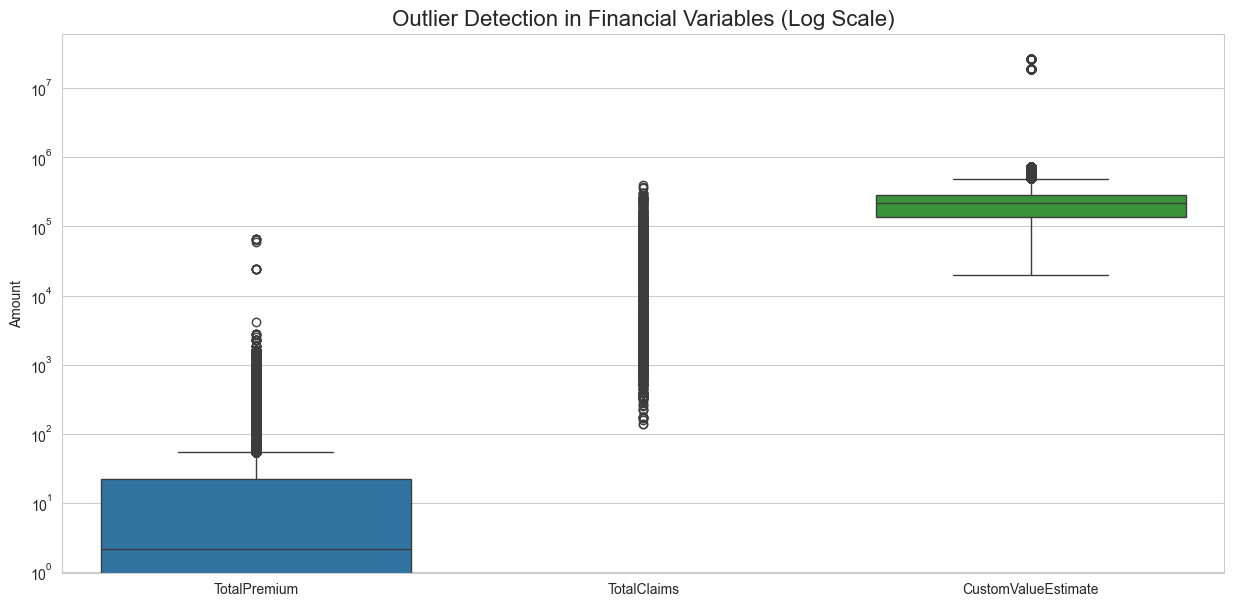

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'LossRatio']


In [20]:
print("--- Generating Outlier Detection Plots ---")

# Box plots to detect outliers
plt.figure(figsize=(15, 7))
sns.boxplot(data=df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']])
plt.title('Outlier Detection in Financial Variables (Log Scale)', fontsize=16)
plt.ylabel('Amount')
plt.yscale('log') # Log scale is crucial for visualization
plt.savefig(os.path.join(PLOTS_DIR, 'outlier_boxplots.png'), bbox_inches='tight', dpi=150)
plt.show()
print(df.columns.tolist())

--- Generating Key Insight Visualizations ---


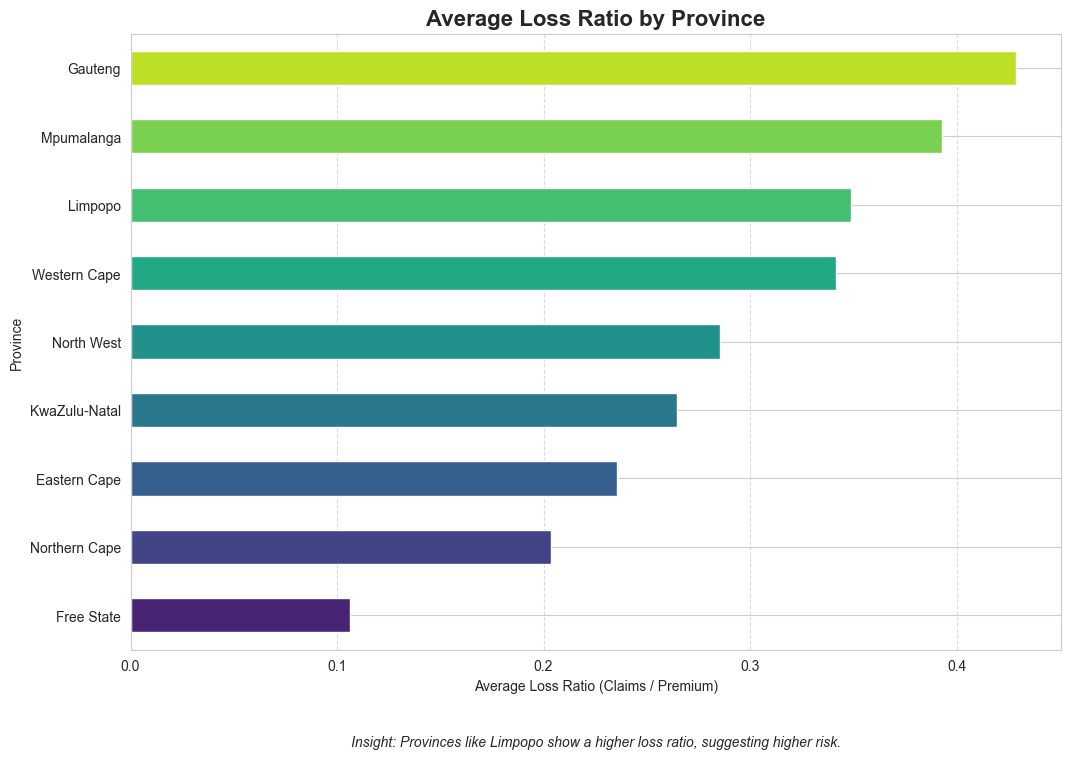

In [ ]:
print("--- Generating Key Insight Visualizations ---")

# Plot 1: Loss Ratio by Province
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium'].replace(0, np.nan)
province_loss_ratio = df.groupby('Province')['LossRatio'].mean().dropna().sort_values()

plt.figure(figsize=(12, 8))
province_loss_ratio.plot(kind='barh', color=sns.color_palette('viridis', len(province_loss_ratio)))
plt.title('Average Loss Ratio by Province', fontsize=16, fontweight='bold')
plt.xlabel('Average Loss Ratio (Claims / Premium)')
plt.ylabel('Province')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.text(0.5, -0.15, 'Insight: Provinces like Limpopo show a higher loss ratio, suggesting higher risk.', 
         ha='center', va='center', transform=plt.gca().transAxes, style='italic')
plt.savefig(os.path.join(PLOTS_DIR, 'insight_loss_ratio_by_province.png'), bbox_inches='tight', dpi=150)
plt.show()


C:\Users\Yoga i7\AppData\Local\Temp\ipykernel_16116\2316429403.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=claims_top_makes_df, x='TotalClaims', y='make', order=top_10_makes, palette='magma')


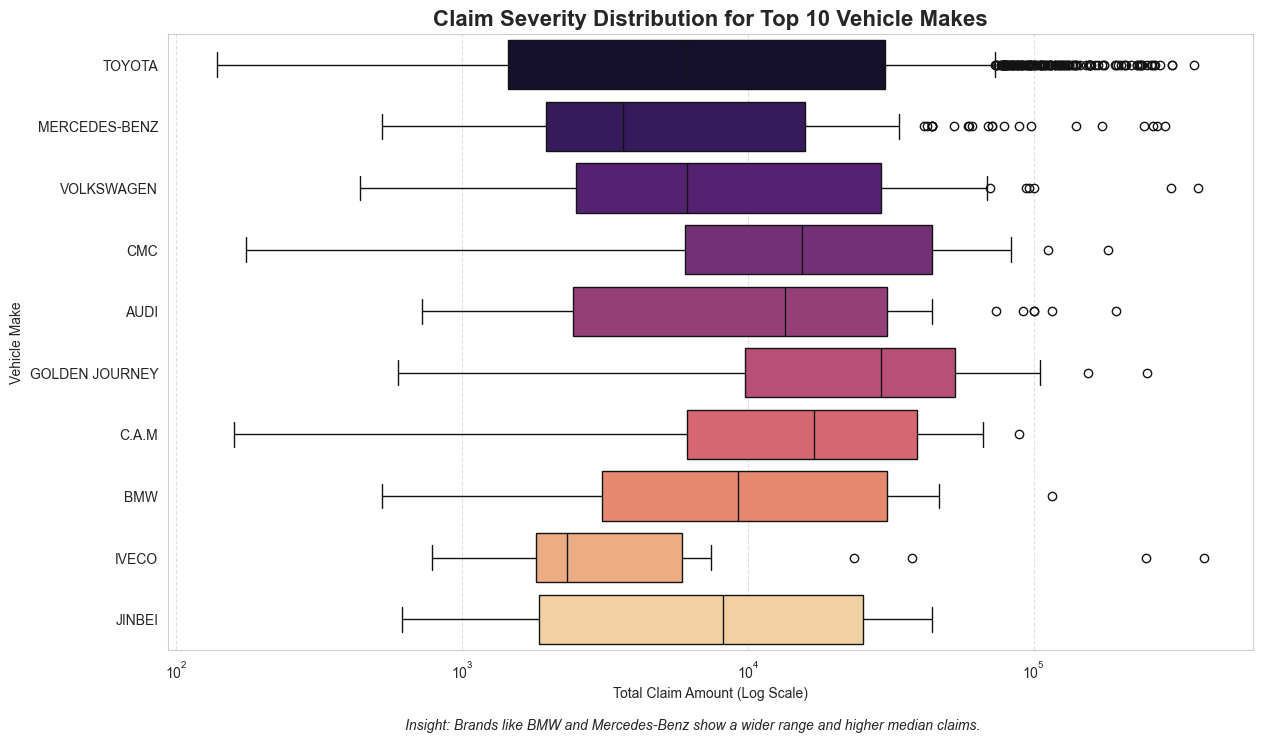

In [ ]:
# Plot 2: Claim Severity by Vehicle Make (Top 10)
claims_df = df[df['TotalClaims'] > 0].copy()

top_10_makes = claims_df['make'].value_counts().nlargest(10).index
claims_top_makes_df = claims_df[claims_df['make'].isin(top_10_makes)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=claims_top_makes_df, x='TotalClaims', y='make', order=top_10_makes, palette='magma')
plt.title('Claim Severity Distribution for Top 10 Vehicle Makes', fontsize=16, fontweight='bold')
plt.xlabel('Total Claim Amount (Log Scale)')
plt.ylabel('Vehicle Make')
plt.xscale('log')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.figtext(0.5, 0.01, 'Insight: Brands like BMW and Mercedes-Benz show a wider range and higher median claims.', 
            ha='center', style='italic')
plt.savefig(os.path.join(PLOTS_DIR, 'insight_claim_severity_by_make.png'), bbox_inches='tight', dpi=150)
plt.show()

In [25]:
print(df['TransactionMonth'].unique())

['2015-03-01 00:00:00' '2015-05-01 00:00:00' '2015-07-01 00:00:00'
 '2015-01-01 00:00:00' '2015-04-01 00:00:00' '2015-06-01 00:00:00'
 '2015-08-01 00:00:00' '2015-02-01 00:00:00' '2014-12-01 00:00:00'
 '2014-11-01 00:00:00' '2014-10-01 00:00:00' '2014-09-01 00:00:00'
 '2014-07-01 00:00:00' '2014-08-01 00:00:00' '2014-03-01 00:00:00'
 '2014-05-01 00:00:00' '2014-04-01 00:00:00' '2014-06-01 00:00:00'
 '2014-02-01 00:00:00' '2013-12-01 00:00:00' '2013-11-01 00:00:00'
 '2014-01-01 00:00:00' '2013-10-01 00:00:00']


C:\Users\Yoga i7\AppData\Local\Temp\ipykernel_16116\4242908539.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trends = df.groupby(pd.Grouper(key='TransactionDate', freq='M'))[['TotalPremium', 'TotalClaims']].sum().reset_index()


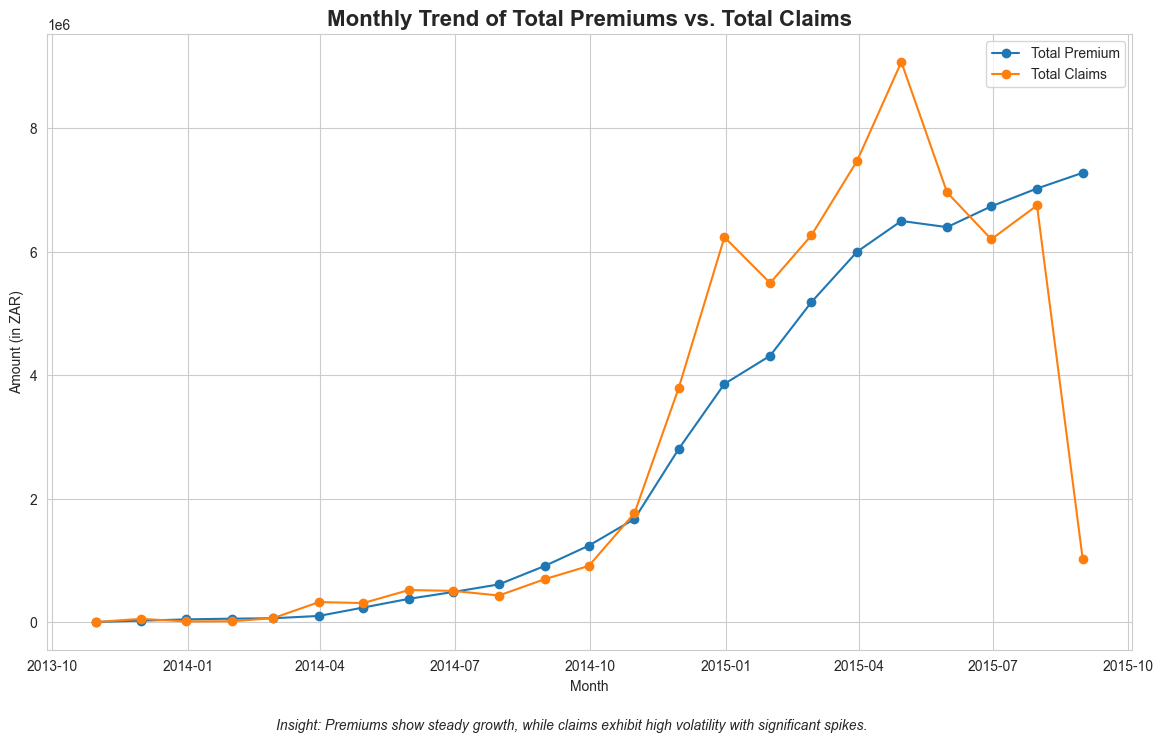

In [27]:
# Plot 3: Temporal Trends of Premiums and Claims

try:
    # Pandas will automatically detect the standard 'YYYY-MM-DD HH:MM:SS' format.
    df['TransactionDate'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

    # Verification Step: Check if all dates were converted successfully.
    if df['TransactionDate'].isnull().all():
        print("--- ERROR: All dates failed to convert. There might be unexpected values in the 'TransactionMonth' column. ---")
    else:
        monthly_trends = df.groupby(pd.Grouper(key='TransactionDate', freq='M'))[['TotalPremium', 'TotalClaims']].sum().reset_index()

        plt.figure(figsize=(14, 8))
        plt.plot(monthly_trends['TransactionDate'], monthly_trends['TotalPremium'], label='Total Premium', marker='o', linestyle='-')
        plt.plot(monthly_trends['TransactionDate'], monthly_trends['TotalClaims'], label='Total Claims', marker='o', linestyle='-')
        plt.title('Monthly Trend of Total Premiums vs. Total Claims', fontsize=16, fontweight='bold')
        plt.xlabel('Month')
        plt.ylabel('Amount (in ZAR)')
        plt.legend()
        plt.grid(True)
        plt.figtext(0.5, 0.01, 'Insight: Premiums show steady growth, while claims exhibit high volatility with significant spikes.',
                    ha='center', style='italic')
        plt.savefig(os.path.join(PLOTS_DIR, 'insight_monthly_trends.png'), bbox_inches='tight', dpi=150)
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")